In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [479]:
df= pd.read_excel("Chronic Kidney Disease Dataset.xls")
df.columns

Index(['ID', 'Age', 'Female', 'Racegrp', 'Educ', 'Unmarried', 'Income',
       'CareSource', 'Insured', 'Weight', 'Height', 'BMI', 'Obese', 'Waist',
       'SBP', 'DBP', 'HDL', 'LDL', 'Total Chol', 'Dyslipidemia', 'PVD',
       'Activity', 'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension',
       'Diabetes', 'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia',
       'CKD'],
      dtype='object')

In [503]:
df[(df["Anemia"].isnull())]

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
3861,3862,64,0,hispa,0.0,0.0,0.0,DrHMO,1.0,74.2,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0
4765,4766,28,1,black,1.0,1.0,0.0,clinic,0.0,63.9,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0
5779,5780,72,1,hispa,0.0,1.0,0.0,clinic,1.0,87.6,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0
8071,8072,26,0,black,1.0,1.0,1.0,DrHMO,1.0,123.1,...,1.0,1,0.0,0,0.0,0.0,1.0,0.0,NaN,NaN
8188,8189,85,1,white,0.0,1.0,NaN,DrHMO,1.0,55.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN
8514,8515,20,1,hispa,0.0,NaN,NaN,noplace,1.0,113.0,...,1.0,0,0.0,0,0.0,0.0,1.0,0.0,NaN,NaN


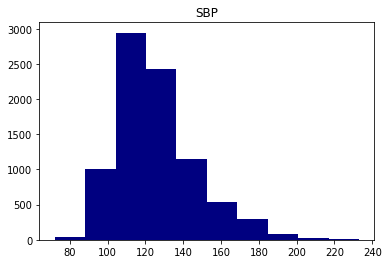

In [377]:
#CHeck normality
plt.hist(df['SBP'], color="navy")
plt.title("SBP")
plt.savefig("SBP.png")

In [28]:
(df["Age"]).describe()

count    8819.000000
mean       49.358204
std        18.828726
min        20.000000
25%        33.000000
50%        47.000000
75%        65.000000
max        85.000000
Name: Age, dtype: float64

In [51]:
stats.ttest_ind(a=(df[df["CKD"] == 1])["SBP"], b= (df[df["CKD"] == 0])["SBP"], equal_var=False )

Ttest_indResult(statistic=nan, pvalue=nan)

In [52]:
pd.DataFrame(((df[df["CKD"] == 0])["Female"]).describe())

,Female
count,5536.000000
mean,0.520412
std,0.499628
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [331]:
df.dropna(inplace=True)
df.drop(['ID'], axis = 1, inplace=True)


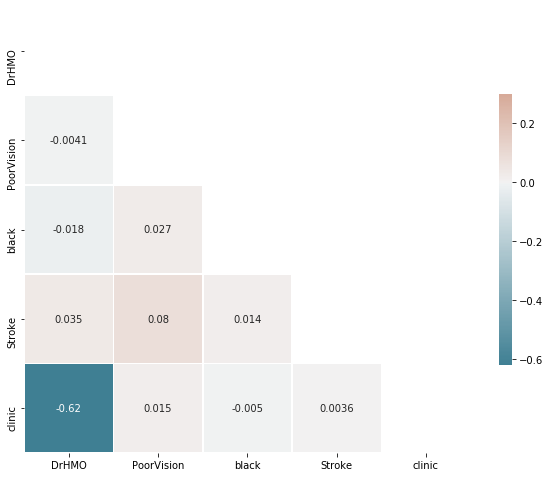

In [421]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df_cleaned[feat_cols_qual].corr(), dtype=bool))
sns.heatmap(df_cleaned[feat_cols_qual].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot_qual.png")

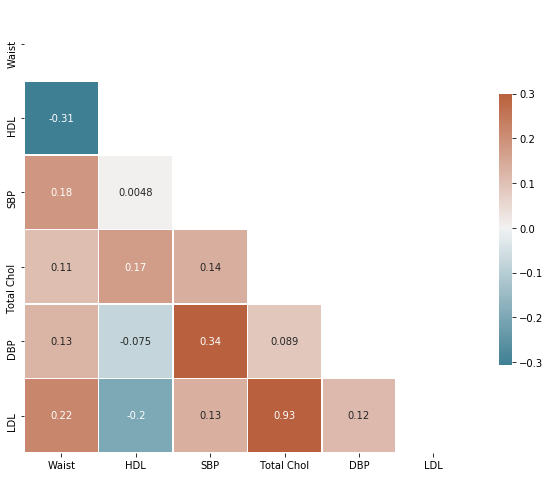

In [423]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df[feat_cols_qaunt].corr(), dtype=bool))
sns.heatmap(df[feat_cols_qaunt].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot_quant.png")

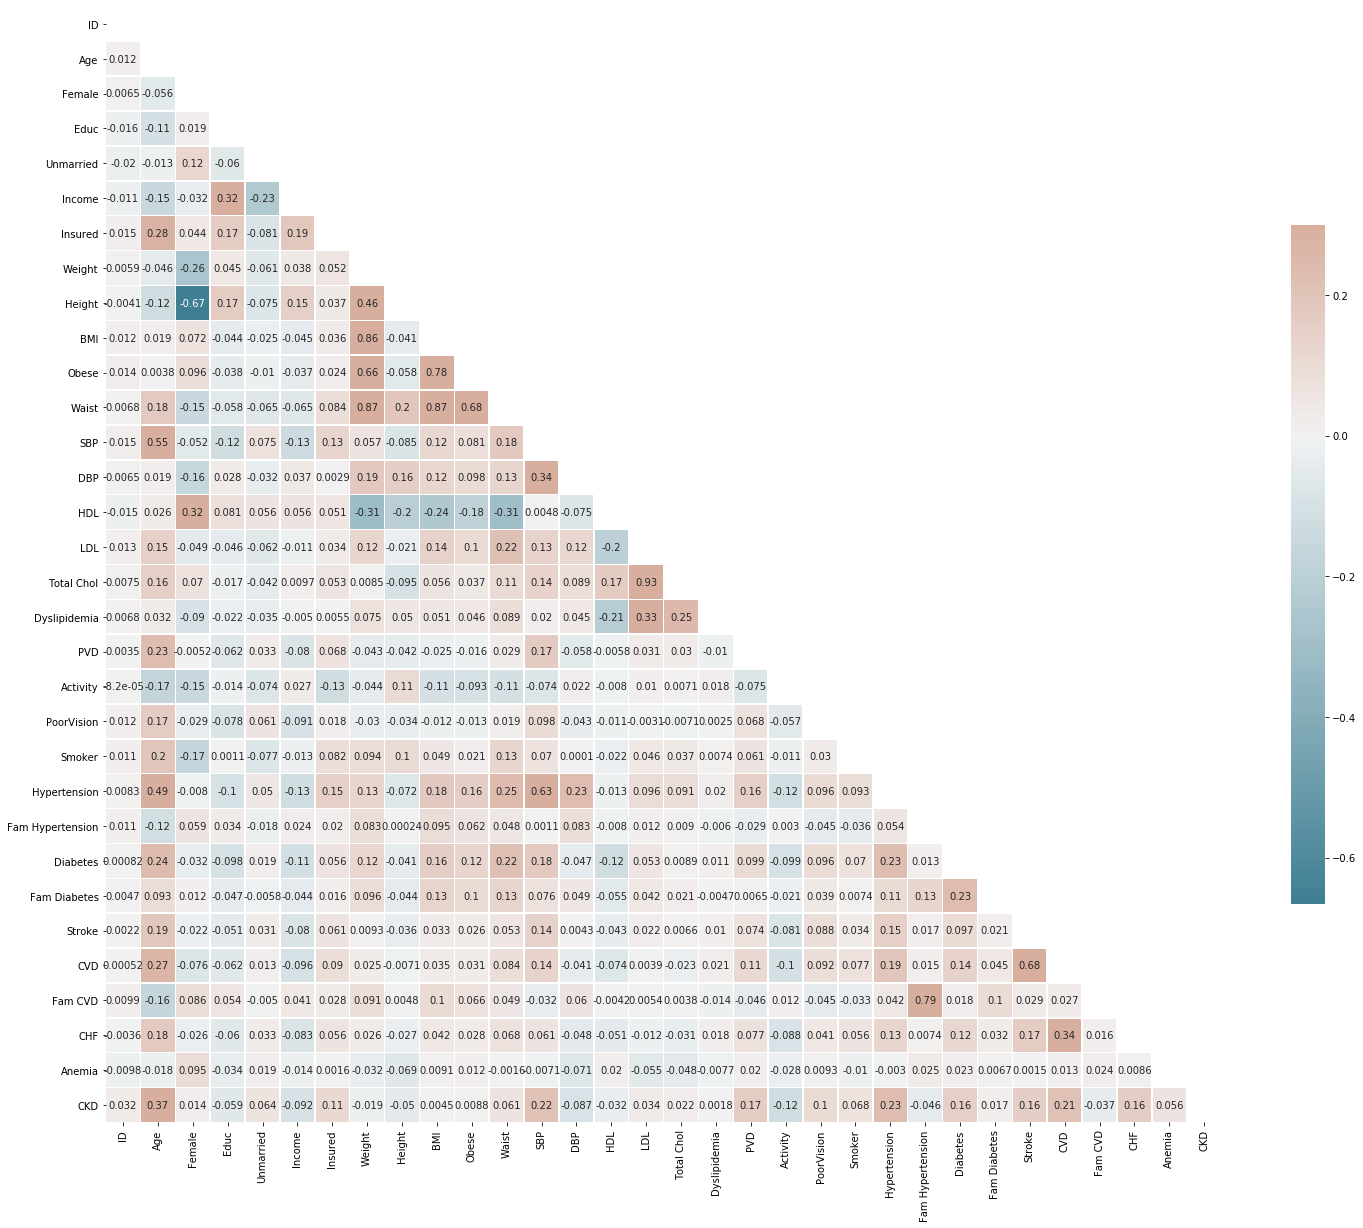

In [361]:
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot.png")

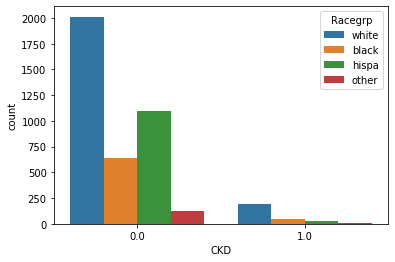

In [6]:
fig = sns.countplot(x='CKD', hue = "Racegrp",data=df)
plt.savefig("CKD vs RaceGrp.png")

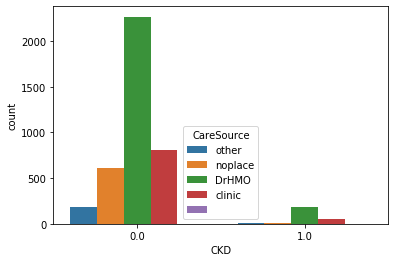

In [7]:
sns.countplot(x='CKD', hue = "CareSource",data=df)

plt.savefig("CKD vs Caresource.png")

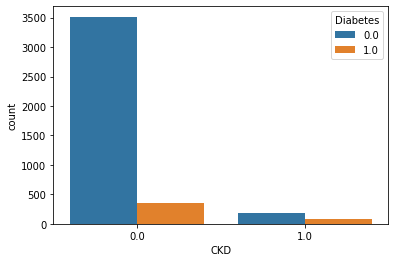

In [8]:
sns.countplot(x='CKD', hue = "Diabetes",data=df)
plt.savefig("CKD vs Diabetes.png")

In [235]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 5999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               4136 non-null   int64  
 1   Female            4136 non-null   int64  
 2   Racegrp           4136 non-null   object 
 3   Educ              4136 non-null   float64
 4   Unmarried         4136 non-null   float64
 5   Income            4136 non-null   float64
 6   CareSource        4136 non-null   object 
 7   Insured           4136 non-null   float64
 8   Weight            4136 non-null   float64
 9   Height            4136 non-null   float64
 10  BMI               4136 non-null   float64
 11  Obese             4136 non-null   float64
 12  Waist             4136 non-null   float64
 13  SBP               4136 non-null   float64
 14  DBP               4136 non-null   float64
 15  HDL               4136 non-null   float64
 16  LDL               4136 non-null   float64


In [332]:
Racegrp = pd.get_dummies(df["Racegrp"])#, drop_first=True)
Racegrp.rename(columns = {"other":"Other_races"}, inplace=True)
CareSource = pd.get_dummies(df["CareSource"])
CareSource.rename(columns = {"other":"Other_CareSource"}, inplace=True)

In [333]:
df_cleaned = pd.concat([df,Racegrp,CareSource], axis=1)
df_cleaned.drop(["Racegrp","CareSource"," "], axis= 1, inplace=True)

In [356]:
df_cleaned

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,...,Anemia,CKD,black,hispa,Other_races,white,DrHMO,clinic,noplace,Other_CareSource
0,65,1,0.0,0.0,1.0,1.0,56.0,162.1,21.31,0.0,...,0.0,0.0,0,0,0,1,0,0,0,1
2,66,1,0.0,1.0,0.0,1.0,83.9,162.5,31.77,1.0,...,0.0,0.0,0,0,0,1,0,0,1,0
3,54,1,1.0,0.0,0.0,1.0,69.4,160.5,26.94,0.0,...,0.0,0.0,0,0,0,1,1,0,0,0
5,26,0,1.0,0.0,0.0,1.0,119.3,193.2,31.96,1.0,...,0.0,0.0,0,0,0,1,1,0,0,0
6,66,0,1.0,0.0,0.0,0.0,85.1,172.1,28.73,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,0,0.0,0.0,0.0,1.0,109.3,185.8,31.66,1.0,...,0.0,1.0,0,0,0,1,1,0,0,0
5996,49,0,0.0,0.0,1.0,1.0,86.6,168.9,30.36,1.0,...,0.0,0.0,0,0,0,1,1,0,0,0
5997,30,0,1.0,1.0,0.0,1.0,78.0,174.9,25.50,0.0,...,0.0,0.0,1,0,0,0,0,1,0,0
5998,75,0,0.0,1.0,0.0,1.0,78.8,176.5,25.30,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0


In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('CKD',axis=1), 
                                                    df_cleaned['CKD'], test_size=0.30, 
                                                    random_state=101)

In [379]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [380]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1154
         1.0       0.65      0.15      0.24        87

    accuracy                           0.93      1241
   macro avg       0.79      0.57      0.60      1241
weighted avg       0.92      0.93      0.92      1241

[[1147    7]
 [  74   13]]


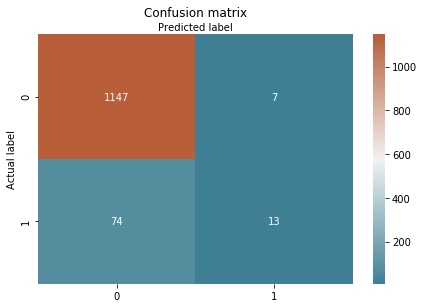

In [381]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("confmatr1.png")

In [382]:
coef = (logmodel.coef_)[0]
labels = df_cleaned.drop(["CKD"], axis=1).columns

In [383]:
logmodel.intercept_

array([-0.03861665])

In [384]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR1.csv")

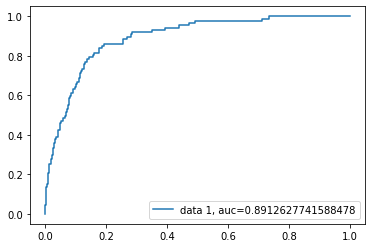

In [386]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.savefig("AUC1.png")

In [343]:
len(coef)

38

In [387]:
results= {'coef':coef, 'labels':labels}
results = pd.DataFrame(results)

results.sort_values(by='coef', inplace=True)

results

,coef,labels
31,-0.529086,hispa
16,-0.496770,Dyslipidemia
36,-0.379087,noplace
22,-0.358998,Fam Hypertension
4,-0.239562,Income
8,-0.230715,BMI
18,-0.206382,Activity
2,-0.198088,Educ
24,-0.174367,Fam Diabetes
28,-0.154726,CHF


/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'Rectangle' object has no property 'annot'

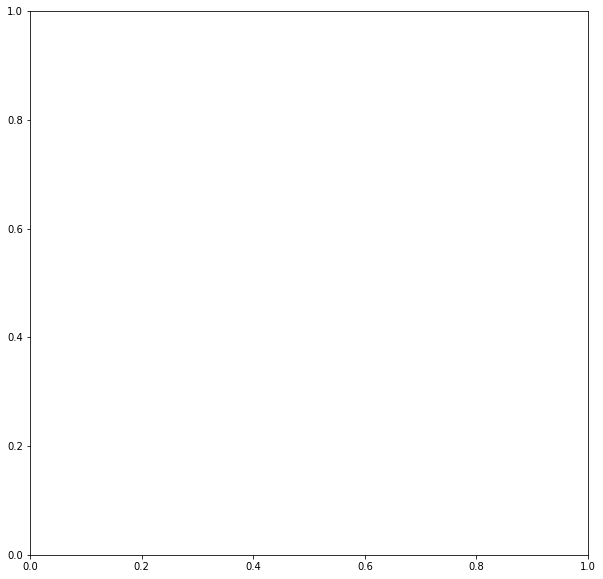

In [564]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( np.exp(results['coef']),results['labels'], orient="h", annot=True)
plt.savefig("coef plot.png")

In [171]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [535]:
df3.columns

Index(['Age', 'Educ', 'Unmarried', 'Income', 'Insured', 'Height', 'Waist',
       'SBP', 'DBP', 'HDL', 'LDL', 'PVD', 'Activity', 'PoorVision', 'Smoker',
       'Hypertension', 'Fam Hypertension', 'Diabetes', 'Stroke', 'CVD',
       'Fam CVD', 'CHF', 'Anemia', 'CKD', 'black', 'hispa', 'Other_races',
       'white', 'DrHMO', 'clinic', 'noplace', 'Other_CareSource'],
      dtype='object')

In [560]:
feat_cols = ["PoorVision",'Waist'
'height',
'HDL',
'SBP',
'DBP',
'LDL']

feat_cols_qaunt = [
'Waist',
'HDL',
'SBP',
'DBP',
'LDL'
]

feat_cols_qual = ["PoorVision"]

In [542]:
df2 = df_cleaned.copy()

In [543]:
df3.drop(feat_cols,axis=1, inplace=True)

In [561]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df3[feat_cols_qaunt].values)
df3['pca-cont'] = pca_result[:,0] + pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df3[feat_cols_qual].values)
df3['pca-cat'] = pca_result[:,0] + pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

KeyError: "None of [Index(['Waist', 'HDL', 'SBP', 'DBP', 'LDL'], dtype='object')] are in the [columns]"

In [544]:
df3

,Age,Educ,Unmarried,Income,Insured,Height,PVD,Activity,Smoker,Hypertension,...,CHF,Anemia,CKD,hispa,Other_races,white,noplace,Other_CareSource,pca-cont,pca-cat
0,65,0.0,0.0,1.0,1.0,162.1,0,3.0,1,0.0,...,0.0,0.0,0.0,0,0,1,0,1,90.273017,0.202132
2,66,0.0,1.0,0.0,1.0,162.5,0,1.0,1,0.0,...,0.0,0.0,0.0,0,0,1,1,0,42.887697,0.202132
3,54,1.0,0.0,0.0,1.0,160.5,0,2.0,1,0.0,...,0.0,0.0,0.0,0,0,1,0,0,-24.565524,-0.616178
5,26,1.0,0.0,0.0,1.0,193.2,0,2.0,0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,17.954747,-0.616178
6,66,1.0,0.0,0.0,0.0,172.1,0,3.0,0,1.0,...,0.0,0.0,0.0,0,0,0,0,0,13.288795,0.393863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,0.0,0.0,0.0,1.0,185.8,0,2.0,1,1.0,...,0.0,0.0,1.0,0,0,1,0,0,67.218737,-0.616178
5996,49,0.0,0.0,1.0,1.0,168.9,0,2.0,0,1.0,...,0.0,0.0,0.0,0,0,1,0,0,-16.161474,-0.616178
5997,30,1.0,1.0,0.0,1.0,174.9,0,1.0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,-14.355815,1.768297
5998,75,0.0,1.0,0.0,1.0,176.5,0,1.0,1,1.0,...,0.0,0.0,0.0,0,0,0,0,0,-17.456380,0.393863


In [545]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.drop('CKD',axis=1), 
                                                    df3['CKD'], test_size=0.30, 
                                                    random_state=101)

In [546]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [547]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.76      0.15      0.25        87

    accuracy                           0.94      1241
   macro avg       0.85      0.57      0.61      1241
weighted avg       0.93      0.94      0.92      1241

[[1150    4]
 [  74   13]]


In [548]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.76      0.15      0.25        87

    accuracy                           0.94      1241
   macro avg       0.85      0.57      0.61      1241
weighted avg       0.93      0.94      0.92      1241

[[1150    4]
 [  74   13]]


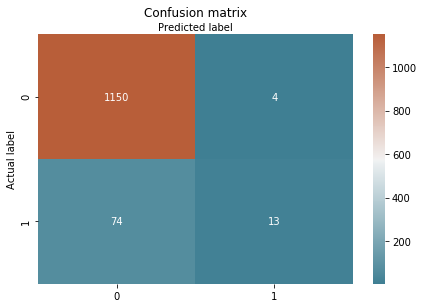

In [549]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("confmatr2.png")

In [554]:
coef = (logmodel.coef_)[0]
labels = df3.drop(["CKD"], axis=1).columns

In [559]:
results

,coef,labels
16,-0.638590,hispa
19,-0.506113,noplace
10,-0.401193,Fam Hypertension
3,-0.283299,Income
7,-0.225490,Activity
1,-0.168137,Educ
14,-0.031822,CHF
22,-0.013872,pca-cat
21,0.001960,pca-cont
8,0.011273,Smoker


In [551]:
logmodel.intercept_

array([-11.1110294])

In [555]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR2.csv")

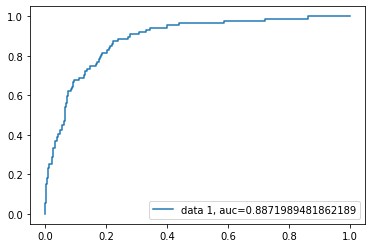

In [556]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.savefig("AUC2.png")

In [557]:
results= {'coef':coef, 'labels':labels}
results = pd.DataFrame(results)
results.sort_values(by='coef', inplace=True)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


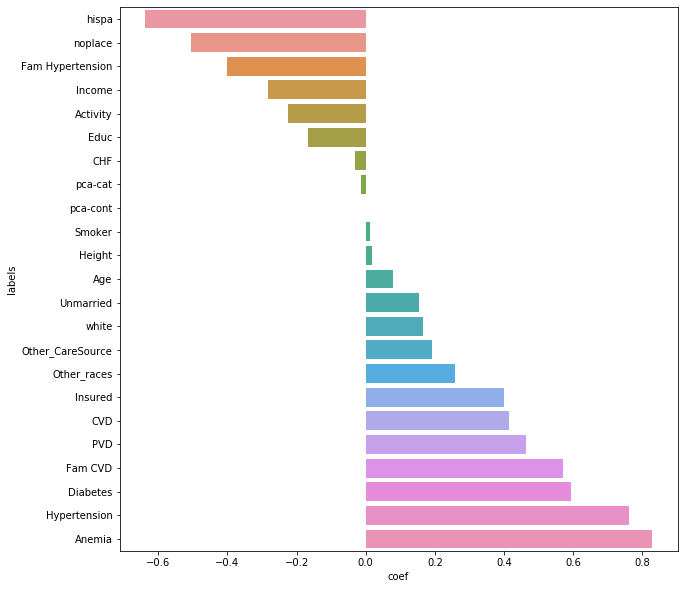

In [558]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( results['coef'],results['labels'], orient="h")
plt.savefig("coef plot 2.png")

In [453]:
x=list(df2['pca-cat'])
y=list(df2['pca-cont'])

In [458]:
df2[["pca-cat",'pca-cont']]

,pca-cat,pca-cont
0,0.202132,128.495308
2,0.202132,72.185492
3,-0.616178,-18.128906
5,-0.616178,21.036249
6,0.393863,4.319311
...,...,...
5995,-0.616178,77.233324
5996,-0.616178,-32.074260
5997,1.768297,-26.998451
5998,0.393863,-24.495473


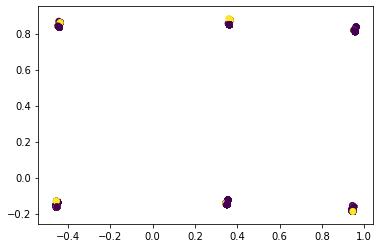

In [464]:
plt.scatter(pca_result[:,0],pca_result[:,1],c=df2["CKD"])

In [504]:
df3=df_cleaned.copy()

In [509]:
df3.drop(["Weight","BMI","Total Chol","Female","Obese","Dyslipidemia","Fam Diabetes"], axis=1, inplace=True)

In [510]:
df3.columns

Index(['Age', 'Educ', 'Unmarried', 'Income', 'Insured', 'Height', 'Waist',
       'SBP', 'DBP', 'HDL', 'LDL', 'PVD', 'Activity', 'PoorVision', 'Smoker',
       'Hypertension', 'Fam Hypertension', 'Diabetes', 'Stroke', 'CVD',
       'Fam CVD', 'CHF', 'Anemia', 'CKD', 'black', 'hispa', 'Other_races',
       'white', 'DrHMO', 'clinic', 'noplace', 'Other_CareSource'],
      dtype='object')

In [511]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.drop('CKD',axis=1), 
                                                    df3['CKD'], test_size=0.30, 
                                                    random_state=101)

In [512]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [513]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.72      0.15      0.25        87

    accuracy                           0.94      1241
   macro avg       0.83      0.57      0.61      1241
weighted avg       0.92      0.94      0.92      1241

[[1149    5]
 [  74   13]]


In [514]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.72      0.15      0.25        87

    accuracy                           0.94      1241
   macro avg       0.83      0.57      0.61      1241
weighted avg       0.92      0.94      0.92      1241

[[1149    5]
 [  74   13]]


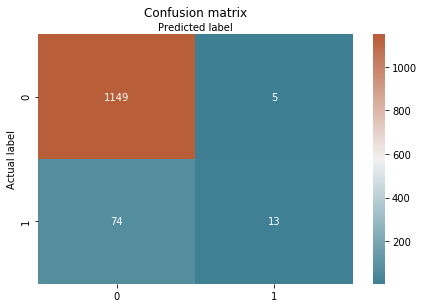

In [533]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("confmatr2.png")

In [527]:
coef = (logmodel.coef_)[0]
labels = df3.drop(["CKD"], axis=1).columns

In [522]:
logmodel.intercept_

array([-5.98941122])

In [529]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR2.csv")

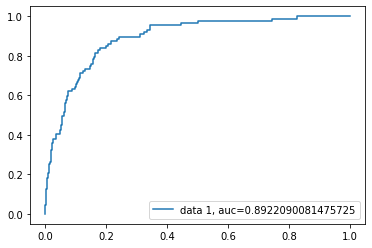

In [530]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.savefig("AUC2.png")

In [531]:
results= {'coef':coef, 'labels':labels}
results = pd.DataFrame(results)
results.sort_values(by='coef', inplace=True)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Length of passed values is 1241, index implies 31.

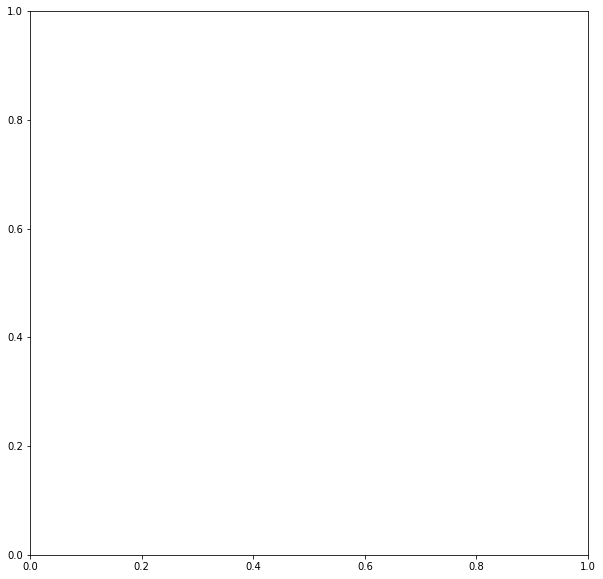

In [534]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( results['coef'],results['labels'], orient="h")
plt.savefig("coef plot 2.png")

In [443]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('CKD',axis=1), 
                                                    df2['CKD'], test_size=0.30, 
                                                    random_state=101)

In [444]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [445]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.78      0.16      0.27        87

    accuracy                           0.94      1241
   macro avg       0.86      0.58      0.62      1241
weighted avg       0.93      0.94      0.92      1241

[[1150    4]
 [  73   14]]


In [446]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.78      0.16      0.27        87

    accuracy                           0.94      1241
   macro avg       0.86      0.58      0.62      1241
weighted avg       0.93      0.94      0.92      1241

[[1150    4]
 [  73   14]]


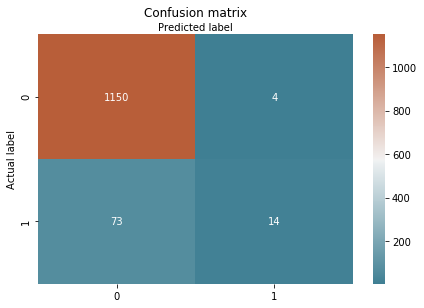

In [447]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("confmatr2.png")

In [435]:
coef = (logmodel.coef_)[0]
labels = df2.drop(["CKD"], axis=1).columns

In [436]:
logmodel.intercept_

array([-0.11169821])

In [437]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR2.csv")

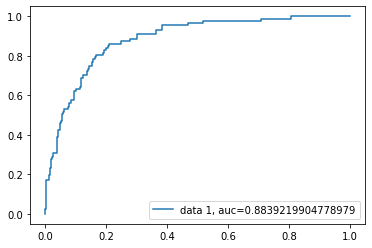

In [438]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.savefig("AUC2.png")

In [439]:
results= {'coef':coef, 'labels':labels}
results = pd.DataFrame(results)
results.sort_values(by='coef', inplace=True)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


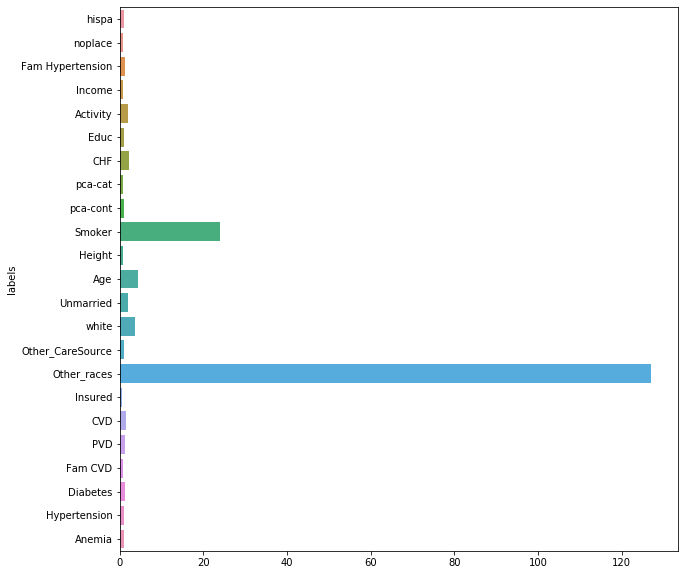

In [576]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( np.exp(c),results['labels'], orient="h")
plt.savefig("coef plot 2.png")

In [573]:
c = coef/(1-coef)

In [568]:
coef

array([ 0.07983108, -0.16813738,  0.15484186, -0.2832992 ,  0.40108038,
        0.01751549,  0.46260317, -0.22549001,  0.01127266,  0.76072503,
       -0.40119345,  0.59307831,  0.41568112,  0.56942374, -0.03182246,
        0.82890116, -0.63859028,  0.25972158,  0.16707875, -0.50611276,
        0.19268603,  0.0019596 , -0.01387223])

In [571]:
c

array([ 0., -1.,  0., -1.,  0.,  0.,  0., -1.,  0.,  3., -1.,  1.,  0.,
        1., -1.,  4., -1.,  0.,  0., -1.,  0.,  0., -1.])